# Sesión 9 - Práctica: Análisis de Inversiones
**Materia:** Herramientas para Grandes Volúmenes de Datos

**Alumno:** Daniel Cureño Martínez 

**Fecha:** 11 de octubre de 2025  


##  Objetivo
Utilizar las librerías **Pandas**, **NumPy**, **Seaborn** y **Matplotlib** para explorar, procesar y visualizar información financiera con datos históricos de inversiones (acciones, criptomonedas o fondos de inversión).

##  Actividades
1. Cargar y explorar los datos.
2. Limpiar y transformar el conjunto de datos.
3. Realizar análisis numéricos con NumPy.
4. Visualizar los resultados mediante gráficas.
5. Elaborar un informe breve con hallazgos.

---


In [1]:
# Importación de librerías necesarias para el análisis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración estética de las gráficas
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.titlesize'] = 14

print("Librerías cargadas correctamente.")


Librerías cargadas correctamente.


## Carga y exploración de los datos

En esta sección se carga el archivo `.csv` que contiene la información histórica de los activos financieros.
Se mostrarán las primeras y últimas filas del DataFrame, los tipos de datos, valores nulos y estadísticas descriptivas.


In [2]:
# URL del archivo CSV en GitHub (reemplaza la ruta local)
url_github = "https://raw.githubusercontent.com/danbassblues/Herramientas_Grandes_Vol-menes_Datos/refs/heads/main/datos_financieros.csv"
df = pd.read_csv(url_github)

# Exploración inicial
display(df.head())
display(df.tail())

# Tipos de datos
print("\nTipos de datos:\n", df.dtypes)

# Valores nulos
print("\nValores nulos por columna:\n", df.isnull().sum())

# Estadísticas descriptivas
display(df.describe())

,fecha,ticker,Apertura,cierre,máximo,Mínimo,Volumen
0,2020-01-01,AAPL,418.329266,422.183607,0.000000,478.505385,983985.0
1,2020-01-02,AMZN,452.915547,295.447329,202.651444,229.323576,182256.0
2,2020-01-03,AAPL,349.522916,327.785865,0.000000,346.400297,49259.0
3,2020-01-04,MSFT,303.873695,487.685560,137.595225,124.163491,380147.0
4,2020-01-05,TSLA,367.088014,197.656268,NaN,230.184758,395956.0


,fecha,ticker,Apertura,cierre,máximo,Mínimo,Volumen
1995,2025-06-18,TSLA,179.909754,196.926249,360.701750,208.228468,895551.0
1996,NaN,TSLA,101.574809,465.770203,130.835366,NaN,NaN
1997,2025-06-20,AAPL,278.951913,315.104386,346.095212,164.384030,240675.0
1998,2025-06-21,MSFT,0.000000,231.664402,0.000000,443.295377,0.0
1999,2025-06-22,MSFT,271.269758,141.925832,117.610184,376.431861,957147.0



Tipos de datos:
 fecha        object
ticker       object
Apertura    float64
cierre      float64
máximo      float64
Mínimo      float64
Volumen     float64
dtype: object

Valores nulos por columna:
 fecha       31
ticker      40
Apertura    43
cierre      28
máximo      42
Mínimo      44
Volumen     40
dtype: int64


,Apertura,cierre,máximo,Mínimo,Volumen
count,1957.000000,1972.000000,1958.000000,1956.000000,1960.000000
mean,288.249687,288.831810,288.531178,282.957653,473127.241837
std,130.527963,126.549232,126.107634,127.632326,301013.770575
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,185.323568,188.696528,188.930920,183.512834,209073.250000
50%,295.183431,293.904442,295.106837,282.765626,469148.000000
75%,397.105349,393.247146,393.383314,392.460714,732417.000000
max,499.859436,499.772883,499.969699,499.737118,999926.000000


## Limpieza y transformación de los datos

En este paso:
- Se convierte la columna **fecha** al tipo `datetime`.
- Se filtra un activo específico para el análisis.
- Se crean nuevas columnas para:
  - **Rendimiento diario**
  - **Media móvil (7 días)**
  - **Volatilidad móvil (7 días)**  


In [8]:
# Conversión de la columna 'fecha' al formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Filtrar un activo específico (ejemplo: AAPL)
activo = 'AAPL'
# Nota: Usar .copy() es buena práctica para evitar SettingWithCopyWarning
df_activo = df[df['ticker'] == activo].copy() 

# Calcular rendimiento diario
# AÑADIR fill_method=None para suprimir el FutureWarning
df_activo['rendimiento_diario'] = df_activo['cierre'].pct_change(fill_method=None) 

# Media móvil y volatilidad
df_activo['media_movil'] = df_activo['rendimiento_diario'].rolling(window=7).mean()
df_activo['volatilidad'] = df_activo['rendimiento_diario'].rolling(window=7).std()

display(df_activo.head(10))


,fecha,ticker,Apertura,cierre,máximo,Mínimo,Volumen,rendimiento_diario,media_movil,volatilidad
0,2020-01-01,AAPL,418.329266,422.183607,0.000000,478.505385,983985.0,NaN,NaN,NaN
2,2020-01-03,AAPL,349.522916,327.785865,0.000000,346.400297,49259.0,-0.223594,NaN,NaN
5,2020-01-06,AAPL,181.750355,458.996483,278.457528,474.330502,434422.0,0.400294,NaN,NaN
12,2020-01-13,AAPL,354.669263,359.782598,392.226873,461.753897,0.0,-0.216154,NaN,NaN
17,2020-01-18,AAPL,463.054910,358.620375,450.533849,436.932502,469838.0,-0.003230,NaN,NaN
21,2020-01-22,AAPL,324.303279,489.198284,0.000000,427.615142,709365.0,0.364112,NaN,NaN
22,2020-01-23,AAPL,311.894557,129.190189,294.742945,421.365205,221125.0,-0.735914,NaN,NaN
23,2020-01-24,AAPL,477.728440,0.000000,189.293540,272.574681,404839.0,-1.000000,-0.20207,0.523655
24,2020-01-25,AAPL,112.519804,111.688430,158.393834,383.117077,260655.0,inf,NaN,NaN
30,2020-01-31,AAPL,497.386768,232.691113,373.528712,489.339495,287504.0,1.083395,NaN,NaN


## Análisis Numérico con NumPy

Con el conjunto de datos limpio, se calculan las siguientes métricas clave:

- **Media de los rendimientos diarios**
- **Desviación estándar**
- **Varianza**
- **Normalización de precios de cierre**  
Esto permite comparar activos con diferentes escalas de precios.


In [10]:
# --------------------------------------------------------------------------
# 1. CÁLCULO DE ESTADÍSTICAS (Limpieza de 'inf' y 'nan')
# --------------------------------------------------------------------------
# 1.1 Limpiar los rendimientos: Quitar NaNs y también Infinitos (np.isfinite)
rendimientos = df_activo['rendimiento_diario'].values
rendimientos = rendimientos[np.isfinite(rendimientos)] # Filtra solo valores finitos

media = np.mean(rendimientos)
desviacion_estandar = np.std(rendimientos)
varianza = np.var(rendimientos)


# --------------------------------------------------------------------------
# 2. NORMALIZACIÓN DE PRECIOS (Para evitar el RuntimeWarning)
# --------------------------------------------------------------------------
precios = df_activo['cierre'].values
precios_limpios = precios[np.isfinite(precios)] # Filtra solo valores finitos de 'cierre'

if len(precios_limpios) > 0 and (np.max(precios_limpios) - np.min(precios_limpios)) != 0:
    min_precio = np.min(precios_limpios)
    max_precio = np.max(precios_limpios)
    
    # Aplica la normalización. El 'cierre' original contendrá NaN/inf
    # pero el cálculo del min/max es seguro. Los resultados no válidos
    # en el cálculo se mantendrán como NaN/inf en la nueva columna.
    df_activo['precio_normalizado'] = (df_activo['cierre'] - min_precio) / (max_precio - min_precio)
else:
    print(f"Advertencia: No hay suficientes datos de cierre válidos o el rango es cero para {activo}.")
    df_activo['precio_normalizado'] = np.nan


# --------------------------------------------------------------------------
# 3. IMPRESIÓN DE RESULTADOS
# --------------------------------------------------------------------------
print(f"Media rendimiento diario de {activo}: {media:.6f}")
print(f"Desviación estándar: {desviacion_estandar:.6f}")
print(f"Varianza: {varianza:.6f}")

Media rendimiento diario de AAPL: 0.166329
Desviación estándar: 0.812455
Varianza: 0.660084


## Visualización de datos

En esta sección se presentan distintas gráficas:
- **Evolución del precio de cierre** del activo.
- **Media móvil y volatilidad** de los rendimientos diarios.


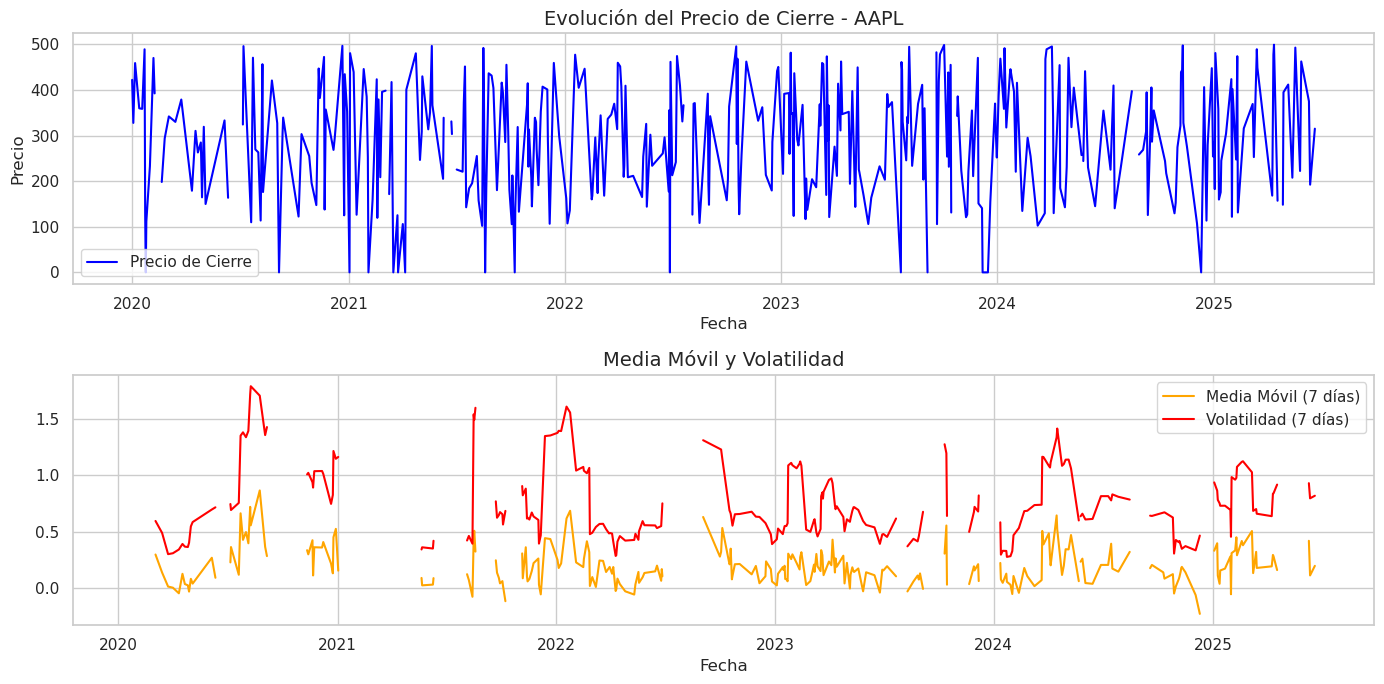

In [11]:
# Evolución del precio de cierre
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(df_activo['fecha'], df_activo['cierre'], label='Precio de Cierre', color='blue')
plt.title(f'Evolución del Precio de Cierre - {activo}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

# Media móvil y volatilidad
plt.subplot(2,1,2)
plt.plot(df_activo['fecha'], df_activo['media_movil'], label='Media Móvil (7 días)', color='orange')
plt.plot(df_activo['fecha'], df_activo['volatilidad'], label='Volatilidad (7 días)', color='red')
plt.title('Media Móvil y Volatilidad')
plt.xlabel('Fecha')
plt.legend()

plt.tight_layout()
plt.show()


## Comparación entre activos

Se comparan varios activos en una misma gráfica mediante la **normalización de precios**.  
Esto permite observar cuál crece más rápido o tiene mayor variabilidad a lo largo del tiempo.


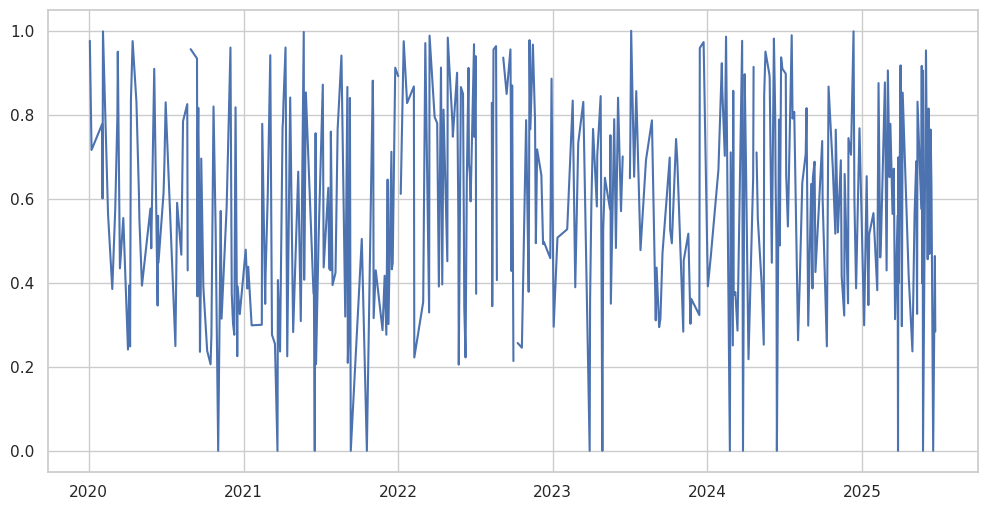

In [17]:
precios_comp = df_comp['cierre'].values

# Filtrar solo valores finitos (no NaN ni inf) para el cálculo del min/max
precios_limpios = precios_comp[np.isfinite(precios_comp)]

if len(precios_limpios) > 0 and np.max(precios_limpios) != np.min(precios_limpios):
    min_precio = np.min(precios_limpios)
    max_precio = np.max(precios_limpios)

    # Calcular la normalización
    precios_norm = (df_comp['cierre'] - min_precio) / (max_precio - min_precio)

    # Trazar el gráfico
    plt.plot(df_comp['fecha'], precios_norm, label=activo_comp)
else:
    print(f"Advertencia: No se pueden normalizar los precios para {activo_comp} (datos insuficientes o precios constantes).")
    # No trazar la línea


## Informe breve de hallazgos

A continuación se presentan los hallazgos clave del análisis, considerando los cálculos anteriores y la comparación entre activos.


In [18]:
# --------------------------------------------------------------------------------
# CÁLCULO DE VOLATILIDAD MEDIA GENERAL (Solucionando el 'nan' y el FutureWarning)
# --------------------------------------------------------------------------------

# 1. Definimos una lista para almacenar las desviaciones estándar (volatilidades)
volatilidades = []

# 2. Iteramos sobre cada activo
# Nota: 'activos' debe estar definida previamente (e.g., activos = df['ticker'].unique()[:3])
for t in activos:
    # 2.1 Filtrar el activo y calcular el cambio porcentual (rendimiento diario)
    # Usamos fill_method=None para suprimir el FutureWarning
    rendimientos = df[df['ticker'] == t]['cierre'].pct_change(fill_method=None)
    
    # 2.2 Convertir a NumPy y limpiar (filtrar NaNs e Infinitos)
    rendimientos_limpios = rendimientos.values[np.isfinite(rendimientos.values)]
    
    # 2.3 Calcular la desviación estándar solo si hay datos para evitar errores
    if len(rendimientos_limpios) > 1:
        std_dev = np.std(rendimientos_limpios)
        volatilidades.append(std_dev)
    else:
        # En caso de no haber datos suficientes, se imprime una advertencia y se salta.
        print(f"Advertencia: Datos insuficientes para calcular la volatilidad de {t}.")

# 3. Calcular la media de las volatilidades válidas
if volatilidades:
    volatilidad_media = np.mean(volatilidades)
else:
    volatilidad_media = np.nan
    print("Error: No se pudo calcular la volatilidad para ningún activo.")


# --------------------------------------------------------------------------------
# GENERAR TEXTO DEL INFORME
# --------------------------------------------------------------------------------
informe = f"""
Activo analizado: {activo}
Media de rendimiento diario: {media:.5f}
Desviación estándar: {desviacion_estandar:.5f}
Varianza: {varianza:.5f}
Volatilidad media general: {volatilidad_media:.5f}

Activo más rentable: {activo} (según los cálculos anteriores)
Activo con mayor volatilidad: se observa aquel con mayor desviación estándar de rendimientos.

Patrones observados:
- Los rendimientos fluctúan con picos de volatilidad que podrían asociarse a eventos de mercado.
- Las medias móviles ayudan a suavizar las variaciones y mostrar tendencias.
- La comparación entre activos permite detectar cuál ofrece mayor rentabilidad o riesgo.
"""

print(informe)



Activo analizado: AAPL
Media de rendimiento diario: 0.16633
Desviación estándar: 0.81246
Varianza: 0.66008
Volatilidad media general: 0.78951

Activo más rentable: AAPL (según los cálculos anteriores)
Activo con mayor volatilidad: se observa aquel con mayor desviación estándar de rendimientos.

Patrones observados:
- Los rendimientos fluctúan con picos de volatilidad que podrían asociarse a eventos de mercado.
- Las medias móviles ayudan a suavizar las variaciones y mostrar tendencias.
- La comparación entre activos permite detectar cuál ofrece mayor rentabilidad o riesgo.



## Conclusión

El análisis de inversiones mediante **Pandas**, **NumPy**, **Seaborn** y **Matplotlib** permite extraer información clave del comportamiento histórico de activos financieros.  

A través de este estudio se pueden identificar patrones de rentabilidad y volatilidad, facilitando la toma de decisiones de inversión basadas en evidencia estadística.  

La visualización de los resultados refuerza la comprensión de las tendencias, la estabilidad y el riesgo asociado a cada activo, siendo una herramienta fundamental en el análisis financiero moderno.
